In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#read as dataframes 
meth_df = pd.read_csv("D:\\Binformatics R&D\\Assignment2_student\\G1\\G1_breast_dna-meth.csv")
gene_df = pd.read_csv("D:\\Binformatics R&D\\Assignment2_student\\G1\\G1_breast_gene-expr.csv")


c:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [3]:
#samples rows
#cols - cpG probes 

meth_df.head()

,Unnamed: 0,Label,cg00001583,cg00001747,cg00002719,cg00011616,cg00013655,cg00025347,cg00034076,cg00036011,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
0,TCGA.3C.AAAU.01,Primary Tumor,0.242943,0.031749,0.516227,0.941399,0.050625,0.254999,0.044503,0.055939,...,0.042057,0.925235,0.482048,0.434733,0.394324,0.210427,0.578899,0.945994,0.418134,0.739519
1,TCGA.3C.AALI.01,Primary Tumor,0.020153,0.057154,0.783211,0.935964,0.623837,0.259896,0.221409,0.052228,...,0.475559,0.952917,0.634238,0.567980,0.501837,0.098401,0.549295,0.961865,0.845781,0.102363
2,TCGA.3C.AALJ.01,Primary Tumor,0.462715,0.057074,0.697199,0.948888,0.625223,0.685907,0.140006,0.074468,...,0.919312,0.026196,0.063643,0.456866,0.439822,0.066748,0.939740,0.714945,0.767472,0.512467
3,TCGA.3C.AALK.01,Primary Tumor,0.541054,0.545638,0.674409,0.184844,0.766111,0.537981,0.215374,0.513302,...,0.519675,0.409943,0.470804,0.556485,0.052204,0.088968,0.039935,0.527980,0.813171,0.508490
4,TCGA.4H.AAAK.01,Primary Tumor,0.515059,0.616939,0.617353,0.114255,0.050625,0.537234,0.234295,0.085008,...,0.925657,0.022932,0.472508,0.538383,0.946346,0.506823,0.935489,0.524704,0.066034,0.778554


In [4]:
#genes - cols 
#samples - rows

gene_df.head()

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,TCGA.3C.AAAU.01,Primary Tumor,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0
1,TCGA.3C.AALI.01,Primary Tumor,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0
2,TCGA.3C.AALJ.01,Primary Tumor,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0
3,TCGA.3C.AALK.01,Primary Tumor,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0
4,TCGA.4H.AAAK.01,Primary Tumor,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0


In [5]:
gene_df.isnull().sum()

Unnamed: 0          0
Label               0
..100130426         0
..100133144         0
..100134869         0
                   ..
ZYX.7791            0
ZZEF1.23140         0
ZZZ3.26009          0
psiTPTE22.387590    0
tAKR.389932         0
Length: 20533, dtype: int64

In [6]:
meth_df.isnull().sum()

Unnamed: 0    0
Label         0
cg00001583    0
cg00001747    0
cg00002719    0
             ..
rs9363764     0
rs939290      0
rs951295      0
rs966367      0
rs9839873     0
Length: 5002, dtype: int64

In [7]:
#size of dfs 
gene_df.shape, meth_df.shape

((1205, 20533), (880, 5002))

In [8]:
#label encode our data 1 - tumor and 0 for norm 

gene_df['Label'] = [1 if s == 'Primary Tumor' else 0 for s in gene_df['Label'].values]
gene_df

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,TCGA.3C.AAAU.01,1,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
1,TCGA.3C.AALI.01,1,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
2,TCGA.3C.AALJ.01,1,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
3,TCGA.3C.AALK.01,1,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
4,TCGA.4H.AAAK.01,1,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,TCGA.WT.AB44.01,1,0.0000,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1201,TCGA.XX.A899.01,1,0.0000,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1202,TCGA.XX.A89A.01,1,0.0000,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1203,TCGA.Z7.A8R5.01,1,0.0000,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


In [9]:
gene_df["CDH1.999"]

0       17916.3996
1       13901.0332
2        8795.1043
3        9765.8254
4         640.4255
           ...    
1200      601.0996
1201      701.5748
1202      604.1568
1203     4250.5152
1204      513.2666
Name: CDH1.999, Length: 1205, dtype: float64

In [10]:
gene_df[gene_df['Label'] == 1].shape, gene_df[gene_df['Label'] == 0].shape

((1093, 20533), (112, 20533))

Breast Cancer tumors data

Normal tissue data

In [11]:
normal_tissue = gene_df[gene_df['Label'] == 0]
normal_tissue

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
125,TCGA.A7.A0CE.11,0,0.0,4.3333,3.9206,78.9238,978.4127,0.0,219.0476,0.9524,...,41.2698,433.3333,1034.2857,60.3175,745.0794,6455.8730,1314.2857,968.2540,265.3968,0.3175
128,TCGA.A7.A0CH.11,0,0.0,4.2087,2.1852,53.6380,970.7569,0.0,136.1542,0.0000,...,45.5101,374.6121,936.9064,34.6027,815.0447,6038.9281,1477.3860,620.9685,466.7607,0.0000
131,TCGA.A7.A0D9.11,0,0.0,3.0550,0.0000,87.5764,770.3666,0.0,109.9796,0.0000,...,94.1955,374.2363,1077.3931,1.5275,1545.3157,2344.7047,1997.9633,730.6517,346.7413,0.0000
134,TCGA.A7.A0DB.11,0,0.0,3.2784,0.8454,61.2165,696.3918,0.0,106.1856,0.0000,...,75.7732,380.4124,1036.5979,0.5155,1453.0928,4177.3196,1769.5876,664.4330,269.0722,0.0000
137,TCGA.A7.A13E.11,0,0.0,2.0931,3.2738,103.8931,912.8577,0.0,67.3300,0.0000,...,86.8459,418.1288,1002.6310,35.6166,1369.5305,4243.2515,1879.3842,877.7290,321.0371,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,TCGA.E9.A1RF.11,0,0.0,2.3355,2.0787,93.3628,613.1621,0.0,116.3724,0.4013,...,98.3146,487.9615,1325.0401,1.6051,1891.6533,2548.9567,1839.0851,936.9984,336.6774,0.0000
1021,TCGA.E9.A1RH.11,0,0.0,2.5335,3.7479,95.9003,760.0503,0.0,144.0536,0.0000,...,81.6583,436.7672,1090.8710,5.8626,1890.2848,2906.1977,1713.9866,865.1591,216.4992,0.0000
1023,TCGA.E9.A1RI.11,0,0.0,1.5032,4.2933,84.4595,765.5299,0.0,64.9213,0.3864,...,83.8566,547.9664,1260.5545,8.8880,2362.2838,2463.9165,1949.9565,982.7070,520.5294,0.0000
1099,TCGA.GI.A2C8.11,0,0.0,6.8563,11.2410,70.5843,1698.0352,0.0,61.5305,0.5171,...,173.2161,520.6825,1832.9886,1.0341,12297.8283,1842.2958,2440.0207,721.3030,250.2585,0.0000


In [12]:
breast_cancer = gene_df[gene_df['Label'] == 1]
breast_cancer

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,TCGA.3C.AAAU.01,1,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
1,TCGA.3C.AALI.01,1,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
2,TCGA.3C.AALJ.01,1,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
3,TCGA.3C.AALK.01,1,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
4,TCGA.4H.AAAK.01,1,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,TCGA.WT.AB44.01,1,0.0000,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1201,TCGA.XX.A899.01,1,0.0000,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1202,TCGA.XX.A89A.01,1,0.0000,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1203,TCGA.Z7.A8R5.01,1,0.0000,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


**Feature selection**

Just for the sake of experimenting, lets take 100 samples from each class

In [13]:
norm = normal_tissue
can = breast_cancer
cat = [norm, can]
sample_set = pd.concat(cat)
sample_set

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
125,TCGA.A7.A0CE.11,0,0.0,4.3333,3.9206,78.9238,978.4127,0.0,219.0476,0.9524,...,41.2698,433.3333,1034.2857,60.3175,745.0794,6455.8730,1314.2857,968.2540,265.3968,0.3175
128,TCGA.A7.A0CH.11,0,0.0,4.2087,2.1852,53.6380,970.7569,0.0,136.1542,0.0000,...,45.5101,374.6121,936.9064,34.6027,815.0447,6038.9281,1477.3860,620.9685,466.7607,0.0000
131,TCGA.A7.A0D9.11,0,0.0,3.0550,0.0000,87.5764,770.3666,0.0,109.9796,0.0000,...,94.1955,374.2363,1077.3931,1.5275,1545.3157,2344.7047,1997.9633,730.6517,346.7413,0.0000
134,TCGA.A7.A0DB.11,0,0.0,3.2784,0.8454,61.2165,696.3918,0.0,106.1856,0.0000,...,75.7732,380.4124,1036.5979,0.5155,1453.0928,4177.3196,1769.5876,664.4330,269.0722,0.0000
137,TCGA.A7.A13E.11,0,0.0,2.0931,3.2738,103.8931,912.8577,0.0,67.3300,0.0000,...,86.8459,418.1288,1002.6310,35.6166,1369.5305,4243.2515,1879.3842,877.7290,321.0371,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,TCGA.WT.AB44.01,1,0.0,0.0000,3.2580,42.2643,1877.4180,0.0,704.5408,4.0725,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1201,TCGA.XX.A899.01,1,0.0,14.3858,21.4409,137.7756,652.7559,0.0,427.1654,2.7559,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1202,TCGA.XX.A89A.01,1,0.0,22.3240,27.2744,64.1427,722.7208,0.0,376.4761,0.4724,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1203,TCGA.Z7.A8R5.01,1,0.0,2.2638,7.2933,85.0461,1140.2801,0.0,252.0682,0.5973,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


Data seems to be quite sparse - lots of 0s. Since this is gene expression for RPKM values = 0 is probs not necessarily helpful for our classification analysis so we can probs dropped them for our analysis since no read was mapped in this instance


In [14]:
gene_features = sample_set.iloc[:,2:]


non_import_cols = []

#if cols contain low expression of less than 0.1 RPKM val we append and drop them 
for col in gene_features.columns:
    column = gene_features[col]
    count = len(column[column <= 0.1])
    if count > 0: #change count of 0s
        non_import_cols.append(col)

sub_df = gene_features.drop(non_import_cols, axis=1)

#print(non_import_cols)
sub_df

,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,A2M.2,A4GALT.53947,...,ZWILCH.55055,ZWINT.11130,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590
125,78.9238,978.4127,219.0476,243.1746,170.4762,608.5714,154.4730,119.5810,40198.2063,627.3016,...,247.8190,213.3333,41.2698,433.3333,1034.2857,745.0794,6455.8730,1314.2857,968.2540,265.3968
128,53.6380,970.7569,136.1542,178.6554,318.9469,663.4697,109.3484,111.9699,32634.9299,924.1185,...,161.1547,144.0527,45.5101,374.6121,936.9064,815.0447,6038.9281,1477.3860,620.9685,466.7607
131,87.5764,770.3666,109.9796,816.7006,102.3422,465.8859,15.7841,105.5041,44700.9521,542.7699,...,98.2688,58.5540,94.1955,374.2363,1077.3931,1545.3157,2344.7047,1997.9633,730.6517,346.7413
134,61.2165,696.3918,106.1856,716.4948,135.0515,470.6186,19.0722,153.5670,41867.0567,648.4536,...,216.1701,156.1856,75.7732,380.4124,1036.5979,1453.0928,4177.3196,1769.5876,664.4330,269.0722
137,103.8931,912.8577,67.3300,755.2666,256.1466,356.6537,41.5445,122.7455,50626.1321,505.9505,...,169.0226,77.0879,86.8459,418.1288,1002.6310,1369.5305,4243.2515,1879.3842,877.7290,321.0371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,42.2643,1877.4180,704.5408,312.7673,1523.1114,469.1509,471.2849,61.7308,5409.3097,356.7502,...,150.0143,180.8186,24.4349,243.5349,772.9587,315.2108,10937.0800,800.6516,443.0869,724.9033
1201,137.7756,652.7559,427.1654,660.2362,525.5906,603.9370,223.2205,131.2283,20348.7559,505.5118,...,456.0472,457.0866,70.8661,643.7008,1266.5354,688.1890,5118.1102,1933.8583,670.0787,98.4252
1202,64.1427,722.7208,376.4761,372.2248,500.2362,704.2985,255.1346,79.9291,17094.8370,615.4936,...,530.1984,694.3788,48.6538,341.5210,1375.5314,746.8115,5477.5626,1437.4114,953.7081,235.2385
1203,85.0461,1140.2801,252.0682,115.2824,277.7529,916.2859,439.5425,81.3010,36838.5210,456.3510,...,173.1087,258.6387,32.2552,248.4843,796.2249,505.9284,6675.6264,754.4127,750.8288,238.9272


In [15]:
(sub_df <= 0.1).sum().sum()

0

In [16]:
sub_df.max().max(), sub_df.min().min()

(1839915.7662, 0.227)

In [17]:
#get the max of ea gene value in ea row = highest expresssed genes 

high_exp_genes = pd.DataFrame(sub_df.idxmax(axis=1))
counts = pd.DataFrame(high_exp_genes.value_counts())
counts

,0
0,
COL1A1.1277,283
FN1.2335,127
EEF1A1.1915,115
ACTB.60,78
MGP.4256,56
...,...
GSN.2934,1
KRT10.3858,1
KIAA1467.57613,1


Log2 Scaling since we have gene expression data. We will want to change the scale so everything is roughly within the same limits. From doing some research it looks like log2(RPKM) is the go too scaling.

In [18]:
df_log2 = pd.DataFrame(np.log2(sub_df))

df_log2

,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,A2M.2,A4GALT.53947,...,ZWILCH.55055,ZWINT.11130,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590
125,6.302389,9.934299,7.775101,7.925849,7.413427,9.249283,7.271211,6.901844,15.294844,9.293015,...,7.953143,7.736965,5.367015,8.759333,10.014419,9.541250,12.656396,10.360063,9.919242,8.052007
128,5.745184,9.922966,7.089098,7.481036,8.317172,9.373887,6.772788,6.806967,14.994129,9.851934,...,7.332302,7.170453,5.508115,8.549254,9.871761,9.670735,12.560077,10.528831,9.278376,8.866539
131,6.452470,9.589401,6.781092,9.673663,6.677257,8.863833,3.980400,6.721155,15.448018,9.084197,...,6.618662,5.871696,6.557586,8.547806,10.073329,10.593686,11.195191,10.964314,9.513040,8.437716
134,5.935849,9.443755,6.730444,9.484812,7.077366,8.878415,4.253399,7.262724,15.353528,9.340860,...,7.756023,7.287118,6.243616,8.571420,10.017641,10.504911,12.028362,10.789197,9.375980,8.071850
137,6.698956,9.834246,6.073178,9.560842,8.000826,8.478380,5.376586,6.939526,15.627595,8.982852,...,7.401072,6.268433,6.440386,8.707804,9.969575,10.419466,12.050954,10.876044,9.777632,8.326596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,5.401368,10.874534,9.460539,8.288946,10.572806,8.873908,8.880456,5.947919,12.401229,8.478770,...,7.228956,7.498399,4.610871,7.927985,9.594248,8.300173,13.416940,9.645031,8.791446,9.501645
1201,7.106177,9.350400,8.738651,9.366838,9.037796,9.238254,7.802326,7.035935,14.312653,8.981601,...,8.833039,8.836324,6.147024,9.330246,10.306672,9.426661,12.321395,10.917266,9.388187,6.620956
1202,6.003213,9.497295,8.556414,8.540030,8.966466,9.460043,7.995115,6.320649,14.061273,9.265600,...,9.050389,9.439579,5.604481,8.415830,10.425773,9.544600,12.419318,10.489257,9.897404,7.877980
1203,6.410173,10.155173,7.977670,6.849028,8.117658,9.839654,8.779859,6.345201,15.168928,8.834000,...,7.435534,8.014794,5.011460,7.957011,9.637032,8.982789,12.704688,9.559210,9.552340,7.900427


In [19]:
reduced_set = pd.concat([gene_df.iloc[:,0:2], sub_df], axis=1)
reduced_set


,Unnamed: 0,Label,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,...,ZWILCH.55055,ZWINT.11130,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590
0,TCGA.3C.AAAU.01,1,52.1503,408.0760,1187.0050,820.9773,289.5134,458.3962,197.0897,102.9634,...,415.8240,931.9575,129.5917,1007.7824,1658.4983,1208.3738,3507.2482,1894.9342,1180.4565,1.7233
1,TCGA.3C.AALI.01,1,69.7553,563.8934,516.0413,708.5372,449.7009,683.5237,237.3844,70.8646,...,1161.3268,965.1985,59.8151,448.6134,1343.1213,603.5889,5504.6221,1318.6514,406.7428,926.5905
2,TCGA.3C.AALJ.01,1,154.2974,1360.8341,592.0218,391.6591,1100.6346,657.2983,423.2366,161.2602,...,305.4216,2531.2783,35.3581,533.9982,768.8123,532.1850,5458.7489,942.8830,509.5195,35.3581
3,TCGA.3C.AALK.01,1,143.8643,865.5358,552.7513,458.0058,406.2888,786.5122,191.0178,62.5072,...,394.5056,668.5974,55.0269,437.7327,863.8808,607.3645,5691.3529,781.1336,700.8688,66.6115
4,TCGA.4H.AAAK.01,1,84.2128,766.3830,260.8511,449.3617,92.7660,705.5319,268.8809,154.3702,...,405.7106,674.4681,48.9362,424.2553,1049.7872,775.7447,4041.7021,831.9149,881.7021,187.2340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,TCGA.WT.AB44.01,1,42.2643,1877.4180,704.5408,312.7673,1523.1114,469.1509,471.2849,61.7308,...,150.0143,180.8186,24.4349,243.5349,772.9587,315.2108,10937.0800,800.6516,443.0869,724.9033
1201,TCGA.XX.A899.01,1,137.7756,652.7559,427.1654,660.2362,525.5906,603.9370,223.2205,131.2283,...,456.0472,457.0866,70.8661,643.7008,1266.5354,688.1890,5118.1102,1933.8583,670.0787,98.4252
1202,TCGA.XX.A89A.01,1,64.1427,722.7208,376.4761,372.2248,500.2362,704.2985,255.1346,79.9291,...,530.1984,694.3788,48.6538,341.5210,1375.5314,746.8115,5477.5626,1437.4114,953.7081,235.2385
1203,TCGA.Z7.A8R5.01,1,85.0461,1140.2801,252.0682,115.2824,277.7529,916.2859,439.5425,81.3010,...,173.1087,258.6387,32.2552,248.4843,796.2249,505.9284,6675.6264,754.4127,750.8288,238.9272


In [20]:
normal_tissue_red = reduced_set[reduced_set['Label'] == 0]
normal_tissue_red

,Unnamed: 0,Label,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,...,ZWILCH.55055,ZWINT.11130,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590
125,TCGA.A7.A0CE.11,0,78.9238,978.4127,219.0476,243.1746,170.4762,608.5714,154.4730,119.5810,...,247.8190,213.3333,41.2698,433.3333,1034.2857,745.0794,6455.8730,1314.2857,968.2540,265.3968
128,TCGA.A7.A0CH.11,0,53.6380,970.7569,136.1542,178.6554,318.9469,663.4697,109.3484,111.9699,...,161.1547,144.0527,45.5101,374.6121,936.9064,815.0447,6038.9281,1477.3860,620.9685,466.7607
131,TCGA.A7.A0D9.11,0,87.5764,770.3666,109.9796,816.7006,102.3422,465.8859,15.7841,105.5041,...,98.2688,58.5540,94.1955,374.2363,1077.3931,1545.3157,2344.7047,1997.9633,730.6517,346.7413
134,TCGA.A7.A0DB.11,0,61.2165,696.3918,106.1856,716.4948,135.0515,470.6186,19.0722,153.5670,...,216.1701,156.1856,75.7732,380.4124,1036.5979,1453.0928,4177.3196,1769.5876,664.4330,269.0722
137,TCGA.A7.A13E.11,0,103.8931,912.8577,67.3300,755.2666,256.1466,356.6537,41.5445,122.7455,...,169.0226,77.0879,86.8459,418.1288,1002.6310,1369.5305,4243.2515,1879.3842,877.7290,321.0371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,TCGA.E9.A1RF.11,0,93.3628,613.1621,116.3724,1035.7143,194.6228,292.9374,12.4398,85.7624,...,166.0955,36.9181,98.3146,487.9615,1325.0401,1891.6533,2548.9567,1839.0851,936.9984,336.6774
1021,TCGA.E9.A1RH.11,0,95.9003,760.0503,144.0536,844.6399,168.7605,428.8107,31.2605,129.7529,...,155.7789,55.2764,81.6583,436.7672,1090.8710,1890.2848,2906.1977,1713.9866,865.1591,216.4992
1023,TCGA.E9.A1RI.11,0,84.4595,765.5299,64.9213,873.7320,163.0760,194.3774,12.4471,107.5297,...,156.1202,43.2808,83.8566,547.9664,1260.5545,2362.2838,2463.9165,1949.9565,982.7070,520.5294
1099,TCGA.GI.A2C8.11,0,70.5843,1698.0352,61.5305,456.5667,1139.6070,628.7487,9.8242,49.1158,...,143.5729,16.0290,173.2161,520.6825,1832.9886,12297.8283,1842.2958,2440.0207,721.3030,250.2585


In [21]:
tumor_tissue_red = reduced_set[reduced_set['Label'] == 1]
tumor_tissue_red

,Unnamed: 0,Label,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,...,ZWILCH.55055,ZWINT.11130,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590
0,TCGA.3C.AAAU.01,1,52.1503,408.0760,1187.0050,820.9773,289.5134,458.3962,197.0897,102.9634,...,415.8240,931.9575,129.5917,1007.7824,1658.4983,1208.3738,3507.2482,1894.9342,1180.4565,1.7233
1,TCGA.3C.AALI.01,1,69.7553,563.8934,516.0413,708.5372,449.7009,683.5237,237.3844,70.8646,...,1161.3268,965.1985,59.8151,448.6134,1343.1213,603.5889,5504.6221,1318.6514,406.7428,926.5905
2,TCGA.3C.AALJ.01,1,154.2974,1360.8341,592.0218,391.6591,1100.6346,657.2983,423.2366,161.2602,...,305.4216,2531.2783,35.3581,533.9982,768.8123,532.1850,5458.7489,942.8830,509.5195,35.3581
3,TCGA.3C.AALK.01,1,143.8643,865.5358,552.7513,458.0058,406.2888,786.5122,191.0178,62.5072,...,394.5056,668.5974,55.0269,437.7327,863.8808,607.3645,5691.3529,781.1336,700.8688,66.6115
4,TCGA.4H.AAAK.01,1,84.2128,766.3830,260.8511,449.3617,92.7660,705.5319,268.8809,154.3702,...,405.7106,674.4681,48.9362,424.2553,1049.7872,775.7447,4041.7021,831.9149,881.7021,187.2340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,TCGA.WT.AB44.01,1,42.2643,1877.4180,704.5408,312.7673,1523.1114,469.1509,471.2849,61.7308,...,150.0143,180.8186,24.4349,243.5349,772.9587,315.2108,10937.0800,800.6516,443.0869,724.9033
1201,TCGA.XX.A899.01,1,137.7756,652.7559,427.1654,660.2362,525.5906,603.9370,223.2205,131.2283,...,456.0472,457.0866,70.8661,643.7008,1266.5354,688.1890,5118.1102,1933.8583,670.0787,98.4252
1202,TCGA.XX.A89A.01,1,64.1427,722.7208,376.4761,372.2248,500.2362,704.2985,255.1346,79.9291,...,530.1984,694.3788,48.6538,341.5210,1375.5314,746.8115,5477.5626,1437.4114,953.7081,235.2385
1203,TCGA.Z7.A8R5.01,1,85.0461,1140.2801,252.0682,115.2824,277.7529,916.2859,439.5425,81.3010,...,173.1087,258.6387,32.2552,248.4843,796.2249,505.9284,6675.6264,754.4127,750.8288,238.9272


In [22]:
features = ['Unnamed: 0', 'Label']
avg_tumour = dict()
avg_normal = dict()

#calculate means of both tumour and normal expression
for col in tumor_tissue_red.columns:
    if col not in features:
        avg = np.mean(tumor_tissue_red[col].values)
        avg_tumour[col] = avg

for col in normal_tissue_red.columns:
    if col not in features:
        avg = np.mean(normal_tissue_red[col].values)
        avg_normal[col] = avg

log_fold_change = dict()

#calculate the log fold difference
#because we don't care about the direction of change, just 
#the magnitude, get absolute fold change and then sort 
for tumour, normal in zip(avg_tumour.items(), avg_normal.items()):
    log_fold_change[tumour[0]] = np.log2(abs(tumour[1]/normal[1]))

    
largest_diff = sorted(log_fold_change.items(), key=lambda x: x[1], reverse=True)

In [23]:
log_folds = pd.DataFrame(largest_diff)
log_folds

,0,1
0,MMP11.4320,6.294312
1,ACAN.176,4.462046
2,GJB2.2706,4.298275
3,UBE2C.11065,4.213561
4,KIF4A.24137,4.068073
...,...,...
12667,FHL1.2273,-4.881995
12668,MYOM1.8736,-4.887599
12669,HBB.3043,-5.017721
12670,TTN.7273,-5.798720


In [24]:
top_genes = largest_diff[:40]
top_genes

[('MMP11.4320', 6.294312310173188),
 ('ACAN.176', 4.462045913515259),
 ('GJB2.2706', 4.298274866511738),
 ('UBE2C.11065', 4.213561140858349),
 ('KIF4A.24137', 4.068072830816011),
 ('NUF2.83540', 3.9419236293813675),
 ('MYBL2.4605', 3.870040017451388),
 ('IQGAP3.128239', 3.846829650251104),
 ('MELK.9833', 3.808633792654259),
 ('CXCL11.6373', 3.715552196948338),
 ('KIF14.9928', 3.641411834526163),
 ('PLK1.5347', 3.588422404275443),
 ('EXO1.9156', 3.58837099346737),
 ('FOXM1.2305', 3.5878828940225422),
 ('BIRC5.332', 3.585379585788228),
 ('HJURP.55355', 3.5563122790895205),
 ('TPX2.22974', 3.551697733597133),
 ('CDC20.991', 3.5485944245990493),
 ('WISP1.8840', 3.547240573017976),
 ('CXCL10.3627', 3.5266922241579866),
 ('CILP2.148113', 3.5209384625991538),
 ('KIF2C.11004', 3.5036279365231717),
 ('ISG15.9636', 3.4984315097501777),
 ('KIF20A.10112', 3.4926647904696093),
 ('PBK.55872', 3.49158416309048),
 ('GABRD.2563', 3.483712245549012),
 ('TOP2A.7153', 3.470530992762831),
 ('BUB1.699', 3.4

Take the top 40 most highly expressed genes

In [25]:
top_40_genes = []

for x in top_genes: 
    top_40_genes.append(x[0])

print(top_40_genes)

['MMP11.4320', 'ACAN.176', 'GJB2.2706', 'UBE2C.11065', 'KIF4A.24137', 'NUF2.83540', 'MYBL2.4605', 'IQGAP3.128239', 'MELK.9833', 'CXCL11.6373', 'KIF14.9928', 'PLK1.5347', 'EXO1.9156', 'FOXM1.2305', 'BIRC5.332', 'HJURP.55355', 'TPX2.22974', 'CDC20.991', 'WISP1.8840', 'CXCL10.3627', 'CILP2.148113', 'KIF2C.11004', 'ISG15.9636', 'KIF20A.10112', 'PBK.55872', 'GABRD.2563', 'TOP2A.7153', 'BUB1.699', 'FAM83D.81610', 'UHRF1.29128', 'CEP55.55165', 'DLGAP5.9787', 'MMP9.4318', 'SKA1.220134', 'CENPA.1058', 'ANLN.54443', 'NDC80.10403', 'SGOL1.151648', 'RRM2.6241', 'GDF9.2661']


In [26]:
labels = ['MMP11.4320', 'ACAN.176', 'GJB2.2706', 
'UBE2C.11065', 'KIF4A.24137', 'NUF2.83540', 'MYBL2.4605', 'IQGAP3.128239', 
'MELK.9833', 'CXCL11.6373', 'KIF14.9928', 'PLK1.5347', 'EXO1.9156', 'FOXM1.2305',
'BIRC5.332', 'HJURP.55355', 'TPX2.22974', 'CDC20.991', 'WISP1.8840', 'CXCL10.3627', 
'CILP2.148113', 'KIF2C.11004', 'ISG15.9636', 'KIF20A.10112', 'PBK.55872', 'GABRD.2563', 
'TOP2A.7153', 'BUB1.699', 'FAM83D.81610', 'UHRF1.29128', 'CEP55.55165', 'DLGAP5.9787', 
'MMP9.4318', 'SKA1.220134', 'CENPA.1058', 
'ANLN.54443', 'NDC80.10403', 'SGOL1.151648', 'RRM2.6241', 'GDF9.2661']

selected_features = reduced_set[labels]
feature_set = pd.concat([reduced_set.iloc[:,1:2],selected_features], axis=1)
feature_set

,Label,MMP11.4320,ACAN.176,GJB2.2706,UBE2C.11065,KIF4A.24137,NUF2.83540,MYBL2.4605,IQGAP3.128239,MELK.9833,...,CEP55.55165,DLGAP5.9787,MMP9.4318,SKA1.220134,CENPA.1058,ANLN.54443,NDC80.10403,SGOL1.151648,RRM2.6241,GDF9.2661
0,1,11505.4008,25.8494,299.8532,555.5900,713.4438,295.0280,749.9776,1707.7845,264.3533,...,319.8434,239.8825,479.0758,244.0184,89.2666,828.2151,353.9646,66.5192,1477.2077,36.8785
1,1,9584.5568,122.8929,562.8059,1351.2779,767.2648,494.2904,4292.5503,1754.7580,487.7651,...,572.5938,521.4791,2176.1827,121.2616,343.6650,1566.0685,293.6378,230.5601,3219.1408,38.6079
2,1,14854.9411,102.4479,743.4270,1195.8296,628.2865,472.3481,2933.8169,1932.0036,546.6908,...,325.4760,246.6002,10150.4986,324.5694,236.6274,637.3527,484.1342,101.5413,1305.5304,21.7588
3,1,8525.4448,31.8577,2040.1324,496.8970,378.5685,158.8746,503.5168,618.1216,245.7592,...,290.8564,197.7658,439.8014,93.9181,68.2664,631.7749,183.6988,44.2698,909.3918,36.8225
4,1,32954.0426,19.5745,1945.5319,322.1277,260.4255,122.5532,481.7021,500.8511,245.5319,...,207.2340,196.5957,850.2128,83.4043,61.2766,359.5745,177.8723,37.0213,384.2553,15.7447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,9205.4571,41.5394,4528.6092,54.5714,6.5160,35.8379,32.5799,61.9019,13.0320,...,26.0639,4.0725,750.9672,6.5160,6.5160,65.1598,27.6929,1.6290,21.1769,57.8294
1201,1,7656.2992,35.8268,648.8189,266.1417,248.4252,103.9370,280.3150,819.6850,97.2441,...,218.1102,154.7244,2220.4724,61.8110,27.9528,724.4094,121.6535,42.9134,211.0236,7.8740
1202,1,11416.6273,12.2815,1115.7298,375.5314,427.0194,103.9206,437.8838,283.8923,218.2333,...,240.4346,135.5692,1840.3401,44.4025,49.5985,209.7308,106.7548,40.1512,324.9882,150.2126
1203,1,2920.8852,34.0471,298.6590,136.7858,54.9533,36.4364,172.0276,93.7789,38.8257,...,80.6379,49.5774,1920.9748,30.4632,19.1142,77.6513,71.6782,6.5705,179.7927,193.5310


In [27]:
logged_features = np.log2(feature_set.iloc[:,1:])
logged_features

,MMP11.4320,ACAN.176,GJB2.2706,UBE2C.11065,KIF4A.24137,NUF2.83540,MYBL2.4605,IQGAP3.128239,MELK.9833,CXCL11.6373,...,CEP55.55165,DLGAP5.9787,MMP9.4318,SKA1.220134,CENPA.1058,ANLN.54443,NDC80.10403,SGOL1.151648,RRM2.6241,GDF9.2661
0,13.490024,4.692059,8.228113,9.117877,9.478656,8.204708,9.550704,10.737910,8.046324,3.321221,...,8.321222,7.906184,8.904110,7.930846,6.480049,9.693862,8.467461,6.055699,10.528657,5.204708
1,13.226496,6.941258,9.136494,10.400109,9.583581,8.949215,12.067619,10.777056,8.930043,9.840467,...,9.161368,9.026466,11.087584,6.921979,8.424859,10.612932,8.197894,7.848999,11.652460,5.270824
2,13.858655,6.678747,9.538047,10.223796,9.295279,8.883707,11.518563,10.915882,9.094581,7.233606,...,8.346407,7.946030,13.309263,8.342383,7.886473,9.315948,8.919263,6.665923,10.350420,4.443527
3,13.057559,4.993570,10.994447,8.956803,8.564411,7.311745,8.975896,9.271747,7.941102,5.965186,...,8.184163,7.627649,8.780708,6.553331,6.093104,9.303267,7.521198,5.468251,9.828758,5.202516
4,15.008168,4.290904,10.925949,8.331489,8.024727,6.937264,8.911997,8.968238,7.939767,6.251155,...,7.695117,7.619088,9.731680,6.382050,5.937264,8.490147,7.474698,5.210284,8.585921,3.976794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,13.168274,5.376408,12.144852,5.770073,2.703987,5.163414,5.025910,5.951912,3.703987,3.703987,...,4.703981,2.025915,9.552606,2.703987,2.703987,6.025910,4.791444,0.703987,4.404420,5.853731
1201,12.902431,5.162967,9.341672,8.056051,7.956668,6.699566,8.130905,9.678926,6.603539,7.519358,...,7.768913,7.273557,11.116651,5.949792,4.804921,9.500661,6.926634,5.423356,7.721261,2.977097
1202,13.478849,3.618415,10.123772,8.552790,8.738158,6.699338,8.774404,8.149200,7.769727,8.039512,...,7.909501,7.082886,10.845757,5.472569,5.632225,7.712395,6.738157,5.327371,8.344244,7.230862
1203,11.512190,5.089460,8.222355,7.095775,5.780134,5.187309,7.426496,6.551191,5.278940,3.578504,...,6.333386,5.631611,10.907623,4.928996,4.256573,6.278938,6.163463,2.716003,7.490191,7.596421


Text(0.5, 1.0, 'Pearson Correlation Plot between Top 40 LFC gene')

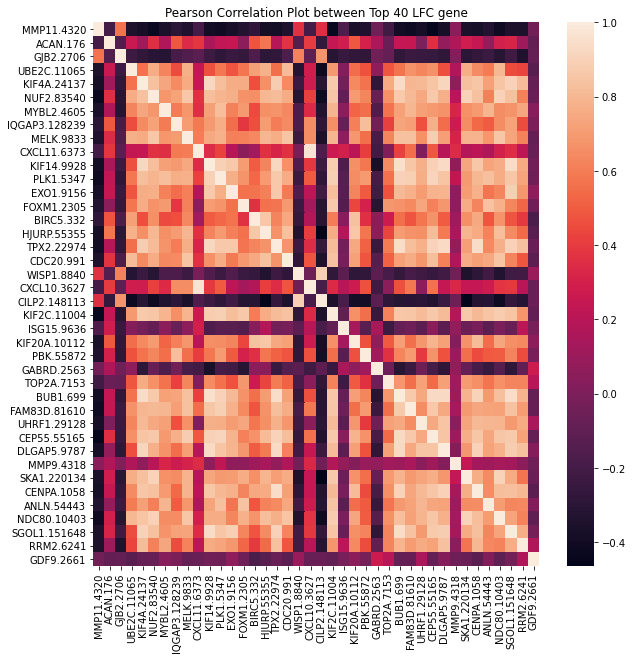

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(selected_features.iloc[0:40,:].corr())
plt.title("Pearson Correlation Plot between Top 40 LFC gene")


First 10 cols from sub_df

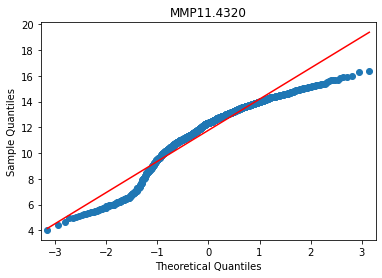

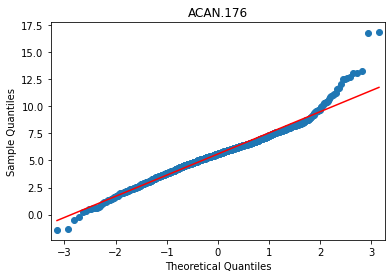

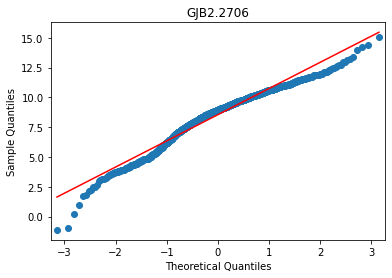

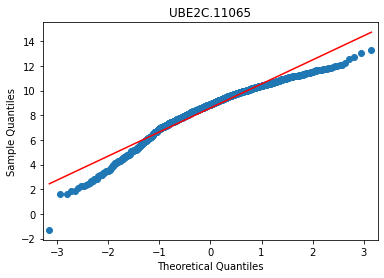

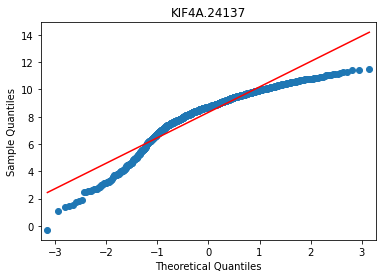

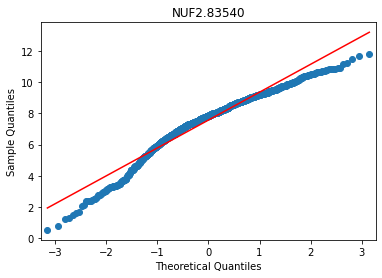

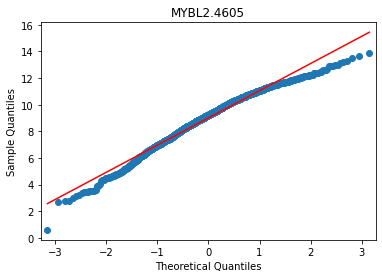

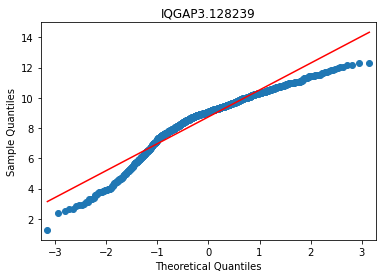

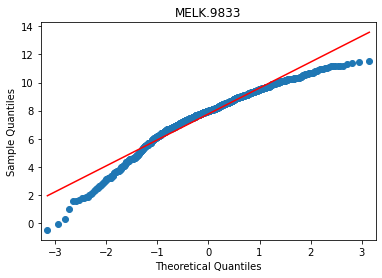

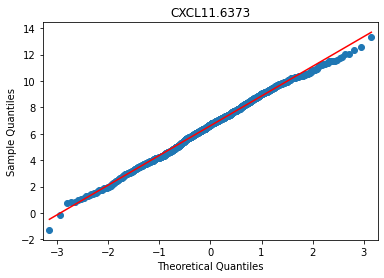

In [29]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt

for i in logged_features.columns[0:10]:
    vals = logged_features[i].values
    qqplot(vals, line='s')
    plt.title(i)
    plt.show()


Looks like our data follows a guassian closely, so probs best to use standardisation as a precaution and to control outliers 

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
#log diff features
standard_data = scaler.fit_transform(logged_features)
#reduced set with 12k features
standard_data_red = scaler.fit_transform(reduced_set.iloc[:,2:])

PCA of using the 12k features

In [31]:
from sklearn.decomposition import PCA
pca_red = PCA(n_components=10)

principalComponents_red = pca_red.fit_transform(standard_data_red)
principal_df = pd.DataFrame(data = principalComponents_red, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10'])
final_df_red = pd.concat([principal_df, feature_set[['Label']]], axis = 1)
final_df_red

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Label
0,7.286182,-8.793702,-29.995977,39.171391,-19.148592,-25.353096,17.283974,5.246811,-0.355935,2.449881,1
1,51.481276,-2.828464,-11.844510,6.867564,-23.523495,-20.553293,22.035759,-16.059479,5.094156,35.931476,1
2,55.584133,-6.900101,-6.345435,14.345035,-15.397249,-8.723574,16.259489,-30.658846,2.019502,18.847729,1
3,32.150860,-19.861814,-4.315494,5.534882,-18.246604,-6.623116,-14.394669,-16.570193,-2.153128,10.210241,1
4,17.394027,-22.472003,-0.326053,15.320444,-18.959960,-6.082353,-11.631550,-19.957519,-6.973195,-9.084181,1
...,...,...,...,...,...,...,...,...,...,...,...
1200,65.894812,-33.887459,2.500521,16.217854,14.904392,43.130358,-25.823216,-22.957318,31.026114,12.203304,1
1201,-0.992197,-25.074662,21.311254,14.486209,-29.190878,3.661828,10.268053,-6.124313,1.868046,-5.521824,1
1202,6.306899,-29.038886,25.875066,-2.066025,-30.244623,2.812487,2.084509,-15.947004,6.549196,6.515470,1
1203,77.398108,-36.098638,21.569969,1.711953,16.029347,23.280436,-7.481838,4.046786,-17.281122,-3.273760,1


Text(0.5, 1.0, ' PC1 vs PC2 of tumor - 1 vs normal tissue - 0')

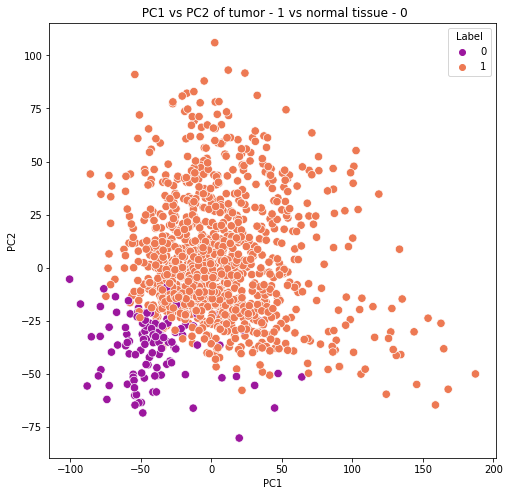

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt 


plt.figure(figsize=(8,8))
sns.scatterplot(data = final_df_red , x = 'PC1',y = 'PC2', hue='Label', s = 70, palette="plasma")
plt.title(" PC1 vs PC2 of tumor - 1 vs normal tissue - 0")

Text(0.5, 1.0, 'Scree Graph of eigenvectors vs eigenvalues')

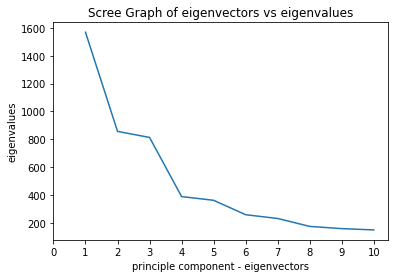

In [33]:
pc_vals = np.arange(pca_red.n_components_) + 1
plt.plot(pc_vals, pca_red.explained_variance_)
plt.xlabel("principle component - eigenvectors")
plt.ylabel("eigenvalues")
plt.xticks(np.arange(0, 11, 1))

plt.title("Scree Graph of eigenvectors vs eigenvalues")

Text(0.5, 1.0, 'proportion of variance explained')

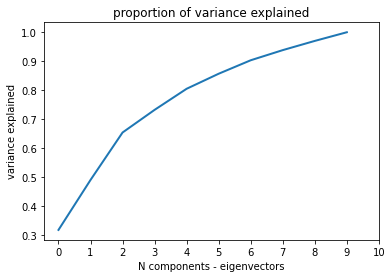

In [34]:
percentage_var_explained = pca_red.explained_variance_ / np.sum(pca_red.explained_variance_)
cumulative_var_explained = np.cumsum(percentage_var_explained)

plt.plot(cumulative_var_explained, linewidth=2)
plt.xlabel("N components - eigenvectors")
plt.ylabel("variance explained")
plt.xticks(np.arange(0, 11, 1))
plt.title("proportion of variance explained")

PCA of using the log_diff 20 features

Text(0.5, 1.0, ' PC1 vs PC2 of tumor - 1 vs normal tissue - 0')

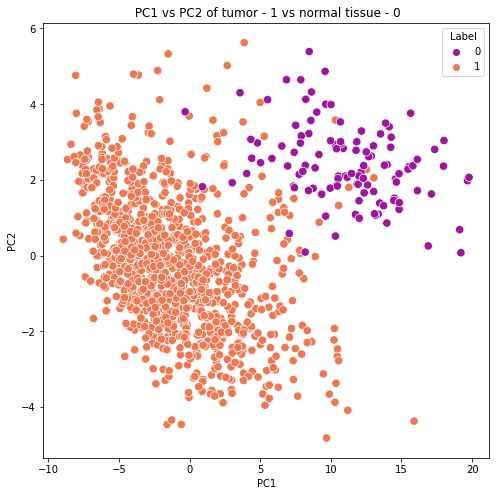

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(standard_data)

principal_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10'])
final_df = pd.concat([principal_df, feature_set[['Label']]], axis = 1)

plt.figure(figsize=(8,8))
sns.scatterplot(data = final_df , x = 'PC1',y = 'PC2', hue='Label', s = 70, palette="plasma")
plt.title(" PC1 vs PC2 of tumor - 1 vs normal tissue - 0")

Scree plots of log_diff

Text(0.5, 1.0, 'Scree Graph of eigenvectors vs eigenvalues log fold change')

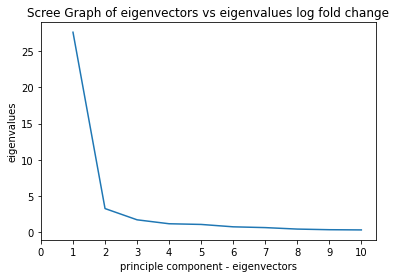

In [36]:
pc_vals = np.arange(pca.n_components_) + 1
plt.plot(pc_vals, pca.explained_variance_)
plt.xlabel("principle component - eigenvectors")
plt.ylabel("eigenvalues")
plt.xticks(np.arange(0, 11, 1))

plt.title("Scree Graph of eigenvectors vs eigenvalues log fold change")

Text(0.5, 1.0, 'proportion of variance explained log fold change')

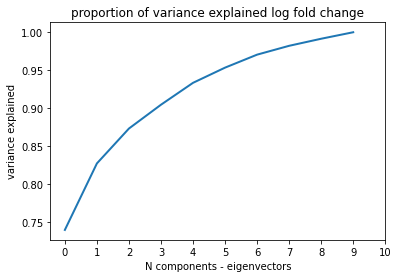

In [37]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cumulative_var_explained = np.cumsum(percentage_var_explained)

plt.plot(cumulative_var_explained, linewidth=2)
plt.xlabel("N components - eigenvectors")
plt.ylabel("variance explained")
plt.xticks(np.arange(0, 11, 1))
plt.title("proportion of variance explained log fold change")

Perform Linear SVM with PCA data from 12k feature reduction set --> 8 PCs

In [86]:
features=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', "PC7", "PC8"] #change this to how many PCs you want
xp=final_df_red[features] # since these are the features we take them as x
yp=final_df_red['Label'] # since labels is the output or label we'll take it as y
x_trainp, x_testp, y_trainp, y_testp = train_test_split(xp, yp, test_size = 0.3,random_state=1)
print(x_trainp.shape)
print(x_testp.shape)
print(y_trainp.shape)
print(y_testp.shape)

(843, 8)
(362, 8)
(843,)
(362,)


In [87]:
from sklearn import svm
svm_classifier_pca = svm.SVC()
svm_classifier_pca.fit(x_trainp, y_trainp)

y_pred_pca =svm_classifier_pca.predict(x_testp)

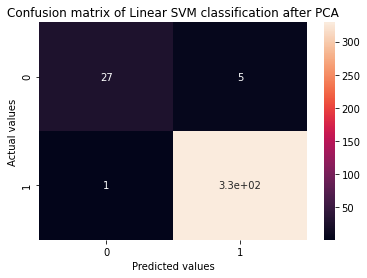

In [90]:
confusion_mat_pca = confusion_matrix(y_testp, y_pred_pca)
ax4 = sns.heatmap(confusion_mat_pca, annot=True)
ax4.set_title('Confusion matrix of Linear SVM classification after PCA')
ax4.set_xlabel('Predicted values')
ax4.set_ylabel('Actual values')
plt.show()

"""
scikit-learn has there axes flipped for the confusion matrix
TOP LH corner - TN
TOP RH corner - FP
BOTTOM LH corner - FN
BOTTOM RH corner - TP
"""

In [89]:
print('\n accuracy SVM of PCA: ', svm_classifier_pca.score(x_testp, y_testp))


 accuracy SVM of PCA:  0.9834254143646409


In [81]:
X=standard_data
y= feature_set['Label']

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#data shapes - check split data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(843, 40)
(362, 40)
(843,)
(362,)


Linear SVMs - logg_diff data

In [82]:
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train,Y_train)

y_pred=svm_classifier.predict(X_test)


In [83]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.99      1.00      0.99       326

    accuracy                           0.99       362
   macro avg       0.98      0.94      0.96       362
weighted avg       0.99      0.99      0.99       362



In [84]:
#output report of findings 
report1=pd.DataFrame()
report1['Actual values']=Y_test
report1['Predicted values by SVM']= y_pred

print(report1)

      Actual values  Predicted values by SVM
101               1                        1
946               1                        1
306               1                        1
109               1                        1
1061              1                        1
...             ...                      ...
787               1                        1
966               1                        1
560               0                        0
790               1                        1
542               0                        0

[362 rows x 2 columns]


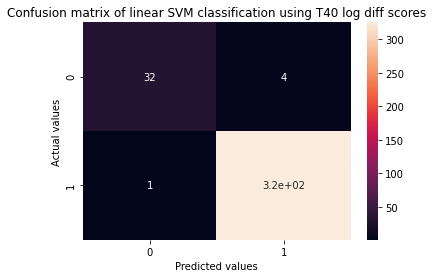


 accuracy SVM using log diff scores:  0.9861878453038674


In [85]:

confusion_mat = confusion_matrix(Y_test,y_pred)

ax = sns.heatmap(confusion_mat, annot=True)
ax.set_title('Confusion matrix of linear SVM classification using T40 log diff scores')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
plt.show()

print('\n accuracy SVM using log diff scores: ', svm_classifier.score(X_test, Y_test))

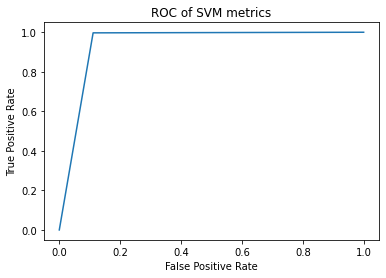

In [47]:
import sklearn.metrics as metrics

fpr, tpr, i = metrics.roc_curve(Y_test,  y_pred)

plt.plot(fpr,tpr)
plt.title("ROC of SVM metrics")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Non-linear SVMs

In [48]:
svm_non_linear = svm.SVC(kernel='rbf')
svm_non_linear.fit(X_train, Y_train)

y_pred_nonlinear =svm_non_linear.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_nonlinear))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.99      1.00      0.99       326

    accuracy                           0.99       362
   macro avg       0.98      0.94      0.96       362
weighted avg       0.99      0.99      0.99       362



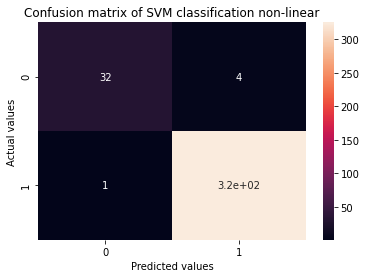


 accuracy SVM non-linear:  0.9861878453038674


In [91]:

confusion_mat_nonlinear = confusion_matrix(Y_test,y_pred_nonlinear)

ax = sns.heatmap(confusion_mat_nonlinear, annot=True)
ax.set_title('Confusion matrix of SVM classification non-linear')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
plt.show()

print('\n accuracy SVM non-linear: ', svm_non_linear.score(X_test, Y_test))

Neural network classification

In [51]:
neural_net_df = pd.read_csv("D:\\Binformatics R&D\\Assignment2_student\\G1\\G1_breast_gene-expr.csv")

data = logged_features
data


,MMP11.4320,ACAN.176,GJB2.2706,UBE2C.11065,KIF4A.24137,NUF2.83540,MYBL2.4605,IQGAP3.128239,MELK.9833,CXCL11.6373,...,CEP55.55165,DLGAP5.9787,MMP9.4318,SKA1.220134,CENPA.1058,ANLN.54443,NDC80.10403,SGOL1.151648,RRM2.6241,GDF9.2661
0,13.490024,4.692059,8.228113,9.117877,9.478656,8.204708,9.550704,10.737910,8.046324,3.321221,...,8.321222,7.906184,8.904110,7.930846,6.480049,9.693862,8.467461,6.055699,10.528657,5.204708
1,13.226496,6.941258,9.136494,10.400109,9.583581,8.949215,12.067619,10.777056,8.930043,9.840467,...,9.161368,9.026466,11.087584,6.921979,8.424859,10.612932,8.197894,7.848999,11.652460,5.270824
2,13.858655,6.678747,9.538047,10.223796,9.295279,8.883707,11.518563,10.915882,9.094581,7.233606,...,8.346407,7.946030,13.309263,8.342383,7.886473,9.315948,8.919263,6.665923,10.350420,4.443527
3,13.057559,4.993570,10.994447,8.956803,8.564411,7.311745,8.975896,9.271747,7.941102,5.965186,...,8.184163,7.627649,8.780708,6.553331,6.093104,9.303267,7.521198,5.468251,9.828758,5.202516
4,15.008168,4.290904,10.925949,8.331489,8.024727,6.937264,8.911997,8.968238,7.939767,6.251155,...,7.695117,7.619088,9.731680,6.382050,5.937264,8.490147,7.474698,5.210284,8.585921,3.976794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,13.168274,5.376408,12.144852,5.770073,2.703987,5.163414,5.025910,5.951912,3.703987,3.703987,...,4.703981,2.025915,9.552606,2.703987,2.703987,6.025910,4.791444,0.703987,4.404420,5.853731
1201,12.902431,5.162967,9.341672,8.056051,7.956668,6.699566,8.130905,9.678926,6.603539,7.519358,...,7.768913,7.273557,11.116651,5.949792,4.804921,9.500661,6.926634,5.423356,7.721261,2.977097
1202,13.478849,3.618415,10.123772,8.552790,8.738158,6.699338,8.774404,8.149200,7.769727,8.039512,...,7.909501,7.082886,10.845757,5.472569,5.632225,7.712395,6.738157,5.327371,8.344244,7.230862
1203,11.512190,5.089460,8.222355,7.095775,5.780134,5.187309,7.426496,6.551191,5.278940,3.578504,...,6.333386,5.631611,10.907623,4.928996,4.256573,6.278938,6.163463,2.716003,7.490191,7.596421


In [143]:
# Create some labels
from sklearn.preprocessing import LabelEncoder

labels = neural_net_df['Label'].values

encoder = LabelEncoder()
encoder.fit(labels)

encoded_Y = encoder.transform(labels)
print(encoded_Y)
print(encoded_Y.shape)

[0 0 0 ... 0 0 0]
(1205,)


In [144]:
# Let's say we want to split the data in 75 /12.5 /12.5 for train / valid / test dataset
X_train_n, X_remain_n, y_train_n, y_remain_n = train_test_split(standard_data, encoded_Y, train_size=0.75, shuffle=True, random_state=7)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_val_n, X_test_n, y_val_n, y_test_n = train_test_split(X_remain_n,y_remain_n, test_size=0.3, shuffle=True, random_state=7)
print(X_train_n.shape)
print(y_train_n.shape)
print(X_val_n.shape)
print(y_val_n.shape)


(903, 40)
(903,)
(211, 40)
(211,)


In [97]:
print(X_train)

[[ 0.45924454 -0.17353372 -0.15025571 ... -0.19957593 -0.73366528
   0.35898252]
 [-1.6870969   1.53142259 -3.78229255 ...  0.40194919  0.1945143
  -0.11916651]
 [-0.16581041  1.21515331  1.51944262 ...  0.96272354  1.33244919
   0.04830644]
 ...
 [ 0.38475479 -0.3933808  -0.35329278 ... -0.54112472 -0.16460417
   0.32632612]
 [ 1.14143495  0.41378129  1.03488438 ...  0.19357293  0.62844383
  -0.65980999]
 [ 1.71626022  1.13532377  1.38675939 ...  0.36918871  0.82432089
   0.32866678]]


In [146]:
#create model
from tensorflow import keras
from keras import layers

model = Sequential()
model.add(Dense(5,  activation='relu', input_shape=(40,)))
model.add(Dense(4,  activation='relu'))
model.add(Dense(3,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hisotry = model.fit(X_train_n, y_train_n, validation_data=(X_val_n, y_val_n), epochs = 40, batch_size = 32)
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size = 5)

model.summary()

Train on 903 samples, validate on 211 samples
Epoch 1/40
903/903 [==============================] - 0s 378us/step - loss: 0.7224 - accuracy: 0.4607 - val_loss: 0.6945 - val_accuracy: 0.6777
Epoch 2/40
903/903 [==============================] - 0s 52us/step - loss: 0.6810 - accuracy: 0.8106 - val_loss: 0.6665 - val_accuracy: 0.8957
Epoch 3/40
903/903 [==============================] - 0s 48us/step - loss: 0.6577 - accuracy: 0.9480 - val_loss: 0.6482 - val_accuracy: 0.9431
Epoch 4/40
903/903 [==============================] - 0s 48us/step - loss: 0.6400 - accuracy: 0.9568 - val_loss: 0.6306 - val_accuracy: 0.9573
Epoch 5/40
903/903 [==============================] - 0s 45us/step - loss: 0.6223 - accuracy: 0.9679 - val_loss: 0.6118 - val_accuracy: 0.9573
Epoch 6/40
903/903 [==============================] - 0s 49us/step - loss: 0.6023 - accuracy: 0.9723 - val_loss: 0.5891 - val_accuracy: 0.9668
Epoch 7/40
903/903 [==============================] - 0s 47us/step - loss: 0.5748 - accuracy: 0

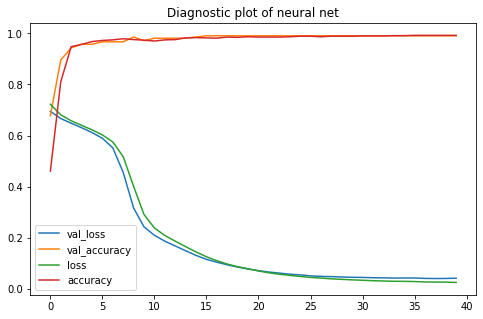

In [147]:
pd.DataFrame(hisotry.history).plot(figsize=(8,5))
plt.title("Diagnostic plot of neural net")
plt.show()

In [148]:
scores = model.evaluate(X_test_n, y_test_n, batch_size=32)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

91/91 [==============================] - 0s 55us/step

accuracy: 100.00%


In [58]:
mystery = pd.read_csv("D:\\Binformatics R&D\\Assignment2_student\\mystery_gene-expr.csv", delimiter=',')
mystery

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,SLC4A4.8671,SLC4A5.57835,SLC4A7.9497,SLC4A8.9498,SLC4A9.83697,SLC5A10.125206,SLC5A11.115584,SLC5A12.159963,SLC5A1.6523,SLC5A2.6524
0,TCGA.BH.A0EI.01,Primary Tumor,0.0000,6.4349,7.4701,93.2677,584.7818,0.0,378.9108,0.0000,...,13.9050,114.2294,650.8304,2354.5771,0.0000,1.5450,3.4762,1.5450,8.4975,0.8884
1,TCGA.EW.A1P4.01,Primary Tumor,0.0000,1.0744,2.7221,130.9719,1260.8200,0.0,111.6173,0.0000,...,33.4093,200.0759,256.6439,24.2976,0.0000,2.0197,0.7593,0.3797,30.3721,0.6948
2,TCGA.A2.A0CM.01,Primary Tumor,0.0000,19.7115,3.8260,238.3801,1431.6372,0.0,125.9952,0.0000,...,14.7687,293.7256,1181.0315,22.6145,0.0000,1.3938,0.9230,0.0000,109.3804,0.0000
3,TCGA.AO.A12B.01,Primary Tumor,0.0000,2.0510,0.4863,62.7720,749.3393,0.0,276.5620,0.0000,...,14.3778,132.0478,2429.0094,2.5373,0.0000,1.4209,0.4229,0.0000,242.3089,0.2453
4,TCGA.E2.A576.01,Primary Tumor,0.0000,2.3190,9.1384,78.9413,1686.9844,0.0,340.5133,0.4583,...,2.2915,1095.5270,394.5921,276.8103,0.4583,15.8249,32.0807,0.0000,6.4161,2.7452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,TCGA.56.7582.11,Solid Tissue Normal,0.0000,20.6902,7.2740,91.3830,532.9844,0.0,204.0721,0.9987,...,815.9556,135.0205,1221.7695,178.1054,0.3329,1.0320,5.3265,1.6645,200.4101,4.7572
376,TCGA.43.3394.11,Solid Tissue Normal,0.0000,2.3955,10.0695,104.3228,393.2881,0.0,50.6592,0.1598,...,1295.5653,234.4674,285.2577,185.6972,0.1598,0.7990,1.9177,0.4794,315.9409,6.2022
377,TCGA.92.7340.11,Solid Tissue Normal,0.0000,13.5526,3.7880,75.6230,495.4032,0.0,87.8989,0.8969,...,1442.5592,190.1338,385.6790,119.2914,0.2990,3.4352,0.5980,3.2887,216.4586,4.1259
378,TCGA.22.5471.11,Solid Tissue Normal,0.4281,2.1404,8.9897,112.6199,525.6849,0.0,44.9486,0.0000,...,1220.8904,209.6147,166.9521,293.2363,0.0000,2.2089,0.0000,0.4281,205.0514,9.4991


In [59]:
mystery.isnull().sum()

Unnamed: 0         0
Label              0
..100130426       76
..100133144       76
..100134869       76
                  ..
SLC5A10.125206     0
SLC5A11.115584     0
SLC5A12.159963     0
SLC5A1.6523        0
SLC5A2.6524        0
Length: 16384, dtype: int64

In [60]:
mystery.replace()

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,SLC4A4.8671,SLC4A5.57835,SLC4A7.9497,SLC4A8.9498,SLC4A9.83697,SLC5A10.125206,SLC5A11.115584,SLC5A12.159963,SLC5A1.6523,SLC5A2.6524
0,TCGA.BH.A0EI.01,Primary Tumor,0.0000,6.4349,7.4701,93.2677,584.7818,0.0,378.9108,0.0000,...,13.9050,114.2294,650.8304,2354.5771,0.0000,1.5450,3.4762,1.5450,8.4975,0.8884
1,TCGA.EW.A1P4.01,Primary Tumor,0.0000,1.0744,2.7221,130.9719,1260.8200,0.0,111.6173,0.0000,...,33.4093,200.0759,256.6439,24.2976,0.0000,2.0197,0.7593,0.3797,30.3721,0.6948
2,TCGA.A2.A0CM.01,Primary Tumor,0.0000,19.7115,3.8260,238.3801,1431.6372,0.0,125.9952,0.0000,...,14.7687,293.7256,1181.0315,22.6145,0.0000,1.3938,0.9230,0.0000,109.3804,0.0000
3,TCGA.AO.A12B.01,Primary Tumor,0.0000,2.0510,0.4863,62.7720,749.3393,0.0,276.5620,0.0000,...,14.3778,132.0478,2429.0094,2.5373,0.0000,1.4209,0.4229,0.0000,242.3089,0.2453
4,TCGA.E2.A576.01,Primary Tumor,0.0000,2.3190,9.1384,78.9413,1686.9844,0.0,340.5133,0.4583,...,2.2915,1095.5270,394.5921,276.8103,0.4583,15.8249,32.0807,0.0000,6.4161,2.7452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,TCGA.56.7582.11,Solid Tissue Normal,0.0000,20.6902,7.2740,91.3830,532.9844,0.0,204.0721,0.9987,...,815.9556,135.0205,1221.7695,178.1054,0.3329,1.0320,5.3265,1.6645,200.4101,4.7572
376,TCGA.43.3394.11,Solid Tissue Normal,0.0000,2.3955,10.0695,104.3228,393.2881,0.0,50.6592,0.1598,...,1295.5653,234.4674,285.2577,185.6972,0.1598,0.7990,1.9177,0.4794,315.9409,6.2022
377,TCGA.92.7340.11,Solid Tissue Normal,0.0000,13.5526,3.7880,75.6230,495.4032,0.0,87.8989,0.8969,...,1442.5592,190.1338,385.6790,119.2914,0.2990,3.4352,0.5980,3.2887,216.4586,4.1259
378,TCGA.22.5471.11,Solid Tissue Normal,0.4281,2.1404,8.9897,112.6199,525.6849,0.0,44.9486,0.0000,...,1220.8904,209.6147,166.9521,293.2363,0.0000,2.2089,0.0000,0.4281,205.0514,9.4991


In [61]:
mystery['Label'] = [1 if s == 'Primary Tumor' else 0 for s in mystery['Label'].values]
mystery

,Unnamed: 0,Label,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,...,SLC4A4.8671,SLC4A5.57835,SLC4A7.9497,SLC4A8.9498,SLC4A9.83697,SLC5A10.125206,SLC5A11.115584,SLC5A12.159963,SLC5A1.6523,SLC5A2.6524
0,TCGA.BH.A0EI.01,1,0.0000,6.4349,7.4701,93.2677,584.7818,0.0,378.9108,0.0000,...,13.9050,114.2294,650.8304,2354.5771,0.0000,1.5450,3.4762,1.5450,8.4975,0.8884
1,TCGA.EW.A1P4.01,1,0.0000,1.0744,2.7221,130.9719,1260.8200,0.0,111.6173,0.0000,...,33.4093,200.0759,256.6439,24.2976,0.0000,2.0197,0.7593,0.3797,30.3721,0.6948
2,TCGA.A2.A0CM.01,1,0.0000,19.7115,3.8260,238.3801,1431.6372,0.0,125.9952,0.0000,...,14.7687,293.7256,1181.0315,22.6145,0.0000,1.3938,0.9230,0.0000,109.3804,0.0000
3,TCGA.AO.A12B.01,1,0.0000,2.0510,0.4863,62.7720,749.3393,0.0,276.5620,0.0000,...,14.3778,132.0478,2429.0094,2.5373,0.0000,1.4209,0.4229,0.0000,242.3089,0.2453
4,TCGA.E2.A576.01,1,0.0000,2.3190,9.1384,78.9413,1686.9844,0.0,340.5133,0.4583,...,2.2915,1095.5270,394.5921,276.8103,0.4583,15.8249,32.0807,0.0000,6.4161,2.7452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,TCGA.56.7582.11,0,0.0000,20.6902,7.2740,91.3830,532.9844,0.0,204.0721,0.9987,...,815.9556,135.0205,1221.7695,178.1054,0.3329,1.0320,5.3265,1.6645,200.4101,4.7572
376,TCGA.43.3394.11,0,0.0000,2.3955,10.0695,104.3228,393.2881,0.0,50.6592,0.1598,...,1295.5653,234.4674,285.2577,185.6972,0.1598,0.7990,1.9177,0.4794,315.9409,6.2022
377,TCGA.92.7340.11,0,0.0000,13.5526,3.7880,75.6230,495.4032,0.0,87.8989,0.8969,...,1442.5592,190.1338,385.6790,119.2914,0.2990,3.4352,0.5980,3.2887,216.4586,4.1259
378,TCGA.22.5471.11,0,0.4281,2.1404,8.9897,112.6199,525.6849,0.0,44.9486,0.0000,...,1220.8904,209.6147,166.9521,293.2363,0.0000,2.2089,0.0000,0.4281,205.0514,9.4991


In [62]:
mystery_features = mystery.iloc[:,2:]
#if cols contain low expression of less than 10 RPKM val we append and drop them 
mystery_features

,..100130426,..100133144,..100134869,..10357,..10431,..136542,..155060,..26823,..280660,..317712,...,SLC4A4.8671,SLC4A5.57835,SLC4A7.9497,SLC4A8.9498,SLC4A9.83697,SLC5A10.125206,SLC5A11.115584,SLC5A12.159963,SLC5A1.6523,SLC5A2.6524
0,0.0000,6.4349,7.4701,93.2677,584.7818,0.0,378.9108,0.0000,0.0,0.0,...,13.9050,114.2294,650.8304,2354.5771,0.0000,1.5450,3.4762,1.5450,8.4975,0.8884
1,0.0000,1.0744,2.7221,130.9719,1260.8200,0.0,111.6173,0.0000,0.0,0.0,...,33.4093,200.0759,256.6439,24.2976,0.0000,2.0197,0.7593,0.3797,30.3721,0.6948
2,0.0000,19.7115,3.8260,238.3801,1431.6372,0.0,125.9952,0.0000,0.0,0.0,...,14.7687,293.7256,1181.0315,22.6145,0.0000,1.3938,0.9230,0.0000,109.3804,0.0000
3,0.0000,2.0510,0.4863,62.7720,749.3393,0.0,276.5620,0.0000,0.0,0.0,...,14.3778,132.0478,2429.0094,2.5373,0.0000,1.4209,0.4229,0.0000,242.3089,0.2453
4,0.0000,2.3190,9.1384,78.9413,1686.9844,0.0,340.5133,0.4583,0.0,0.0,...,2.2915,1095.5270,394.5921,276.8103,0.4583,15.8249,32.0807,0.0000,6.4161,2.7452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.0000,20.6902,7.2740,91.3830,532.9844,0.0,204.0721,0.9987,0.0,0.0,...,815.9556,135.0205,1221.7695,178.1054,0.3329,1.0320,5.3265,1.6645,200.4101,4.7572
376,0.0000,2.3955,10.0695,104.3228,393.2881,0.0,50.6592,0.1598,0.0,0.0,...,1295.5653,234.4674,285.2577,185.6972,0.1598,0.7990,1.9177,0.4794,315.9409,6.2022
377,0.0000,13.5526,3.7880,75.6230,495.4032,0.0,87.8989,0.8969,0.0,0.0,...,1442.5592,190.1338,385.6790,119.2914,0.2990,3.4352,0.5980,3.2887,216.4586,4.1259
378,0.4281,2.1404,8.9897,112.6199,525.6849,0.0,44.9486,0.0000,0.0,0.0,...,1220.8904,209.6147,166.9521,293.2363,0.0000,2.2089,0.0000,0.4281,205.0514,9.4991


In [63]:

non_import_cols = []

#if cols contain low expression of less than 10 RPKM val we append and drop them 
for col in mystery_features.columns:
    column = mystery_features[col]
    count = len(column[column <= 0.1])
    if count > 0: #change count of 0s
        non_import_cols.append(col)

mystery_sub_df = mystery_features.drop(non_import_cols, axis=1)

#print(non_import_cols)
mystery_sub_df

,..10357,..10431,..155060,..57714,..653553,..8225,A1BG.1,A2LD1.87769,A2M.2,A4GALT.53947,...,SLC45A3.85414,SLC45A4.57210,SLC46A1.113235,SLC46A3.283537,SLC47A1.55244,SLC48A1.55652,SLC4A1AP.22950,SLC4A2.6522,SLC4A5.57835,SLC4A7.9497
0,93.2677,584.7818,378.9108,903.4376,152.9548,212.8235,215.2453,86.1993,9009.9228,604.8667,...,149.0923,110.8536,1144.0247,538.4318,378.1383,520.6643,713.4029,1679.5017,114.2294,650.8304
1,130.9719,1260.8200,111.6173,2191.3440,161.3516,236.5224,105.0038,78.6371,4723.5308,1052.0121,...,301.0630,563.0220,390.9377,205.0114,16.7046,138.1929,927.1071,2936.6553,200.0759,256.6439
2,238.3801,1431.6372,125.9952,1354.5633,257.9901,269.0666,49.4566,30.6450,7966.7244,131.0719,...,121.3799,315.6802,120.7892,167.9935,35.0756,287.5274,1077.8078,1374.4964,293.7256,1181.0315
3,62.7720,749.3393,276.5620,296.8601,122.2117,543.8207,212.2042,39.8055,5225.8928,467.7027,...,283.3280,1259.3297,2438.3508,313.3524,7.1889,856.3273,678.1224,1632.0499,132.0478,2429.0094
4,78.9413,1686.9844,340.5133,329.5142,4081.1182,2109.9908,1034.4180,73.7397,8859.9542,1128.3226,...,91.6590,492.6673,1530.6279,110.9074,20.6233,728.2310,551.7874,4266.3886,1095.5270,394.5921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,91.3830,532.9844,204.0721,687.1205,275.9801,477.7218,60.5924,64.7205,114424.9028,449.0918,...,256.6715,1161.8462,999.2243,911.8329,372.8561,876.8776,619.5403,2358.7774,135.0205,1221.7695
376,104.3228,393.2881,50.6592,507.0715,212.0655,467.1195,32.8518,90.1047,77914.9708,407.5110,...,238.5937,707.1514,601.4543,928.4858,242.5889,1260.2477,696.2125,2777.7163,234.4674,285.2577
377,75.6230,495.4032,87.8989,935.1970,119.2914,403.0197,43.7910,58.7099,103940.0314,401.8238,...,119.2914,551.0128,587.9632,633.2312,396.7412,883.1751,613.2147,1682.9150,190.1338,385.6790
378,112.6199,525.6849,44.9486,516.6952,212.3288,615.1541,42.2731,55.1627,88731.1344,540.2397,...,261.5582,779.1096,923.8955,630.9932,568.0651,952.4829,583.0479,3011.7680,209.6147,166.9521


In [64]:
mystery_labels = mystery.iloc[:,1:2]
mystery_test = pd.concat([mystery_sub_df, mystery_labels], axis =1 )
